## Basal Ganglia: Evaluation of Sensitivity vs. Precision Results

These scripts are part of the evaluation process for the **Basal Ganglia (BG)** region in a medical image segmentation pipeline. They aim to analyze sensitivity and precision results per volume and identify the best parameter configurations.

### Script 1 – Minimum Distance to Ideal Point (1,1)

This script calculates the **Euclidean distance** between each `(sensitivity, precision)` point and the ideal point `(1,1)`. The combination with the **smallest distance** is considered optimal for each series.

**Steps:**
1. Load a CSV file containing columns: `SerieName`, `VolumeName`, `sensitivity`, and `precision`.
2. Ensure `sensitivity` and `precision` are numeric.
3. Compute the Euclidean distance to point (1,1).
4. Select the row with the **minimum distance per `SerieName`**.
5. Save the filtered results to a new CSV file.

---

### Script 2 – Plot Sensitivity vs Precision per Series and Volume

This script generates individual **line plots** for each `SerieName`, plotting sensitivity vs. precision for every `VolumeName` using different colors.

**Steps:**
1. Load the same CSV file as above.
2. For each `SerieName`, generate a new plot.
3. Plot all `VolumeName` curves with markers and color labels.
4. Add grid, legend, and axis labels.
5. Display the plots interactively.

In [ ]:
import pandas as pd
import numpy as np

# Load CSV file
df = pd.read_csv('Frangi_Beta_BG.csv')

# Ensure 'sensitivity' and 'precision' columns are numeric
df['sensitivity'] = pd.to_numeric(df['sensitivity'], errors='coerce')
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')

# Compute Euclidean distance to (1, 1)
df['result'] = np.sqrt((df['sensitivity'] - 1)**2 + (df['precision'] - 1)**2)

# Get rows with the minimum distance per SerieName
min_indices = df.loc[df.groupby('SerieName')['result'].idxmin()]

# Filter original DataFrame using those indices
df_filtered = df.loc[min_indices.index]

# Save to a new CSV file
df_filtered.to_csv('BG_filtered_min_values_by_SerieName.csv', index=False)

# Print preview of filtered DataFrame
print(df_filtered.head())

                 SerieName VolumeName  Threshold    TP      TN      FP    FN  \
110010  Frangi_Beta/AAA417   A0.1.nii     0.0000  2446       0  122411     0   
89978   Frangi_Beta/AFH292   A0.9.nii     0.0030   320  131333     420   691   
299956  Frangi_Beta/CBV387  A0.10.nii     0.0073   660  124178     740  2754   
310030  Frangi_Beta/FBR001   A0.1.nii     0.0000   951       0  118585     0   
410040  Frangi_Beta/GPI693   A0.1.nii     0.0000  1013       0  103153     0   

        sensitivity  specificity  precision  accuracy      Dice       MCC  \
110010     1.000000     0.000000   0.019590  0.019590  0.038428  0.000000   
89978      0.316518     0.996812   0.432432  0.991632  0.365505  0.365861   
299956     0.193322     0.994076   0.471429  0.972774  0.274200  0.290308   
310030     1.000000     0.000000   0.007956  0.007956  0.015786  0.000000   
410040     1.000000     0.000000   0.009725  0.009725  0.019262  0.000000   

            snr     psnr    result  
110010  43.8321  40

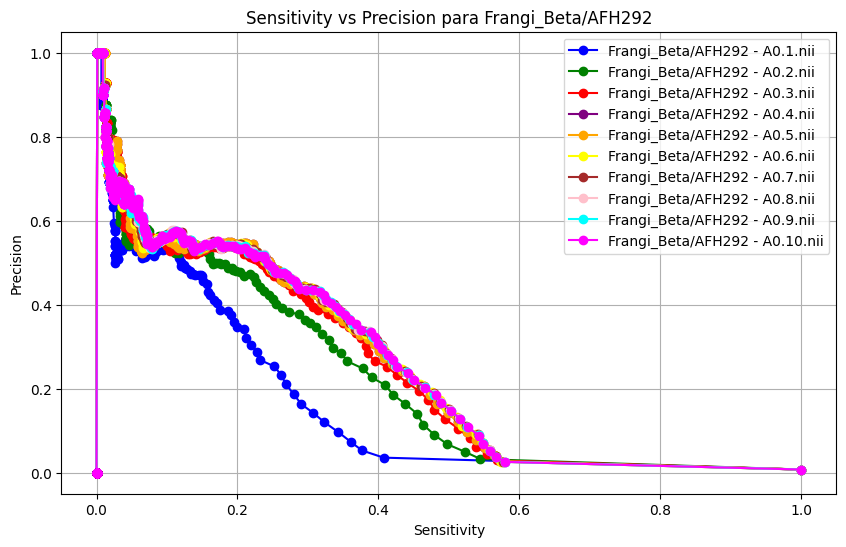

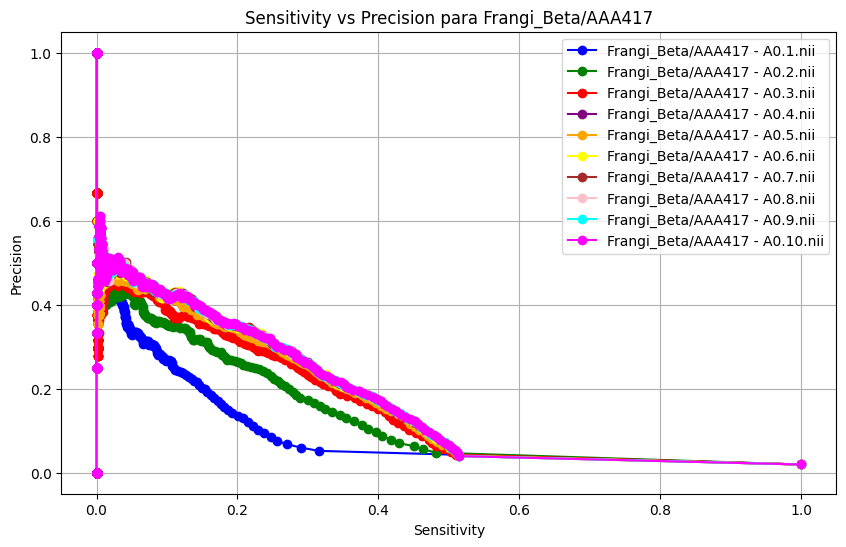

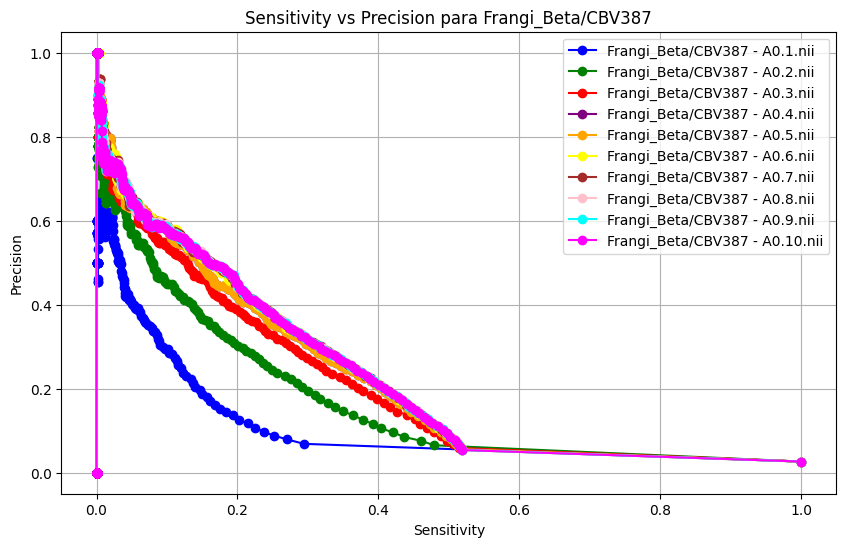

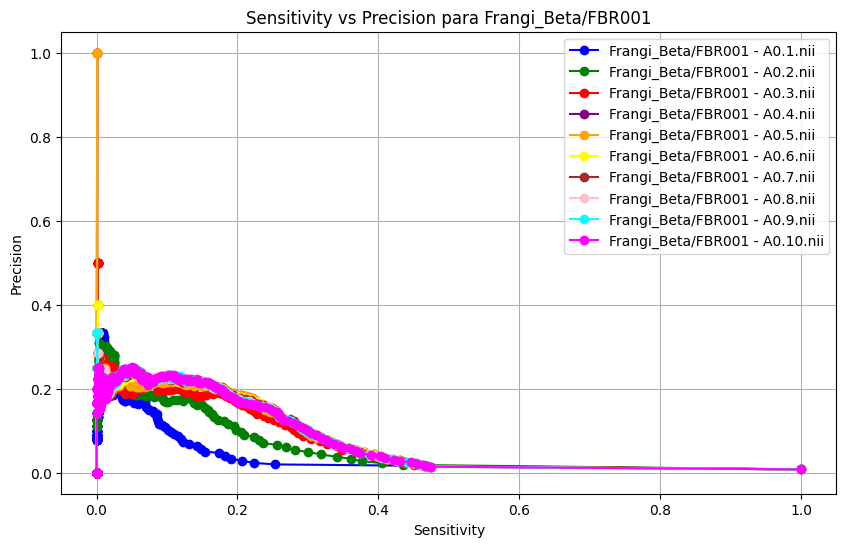

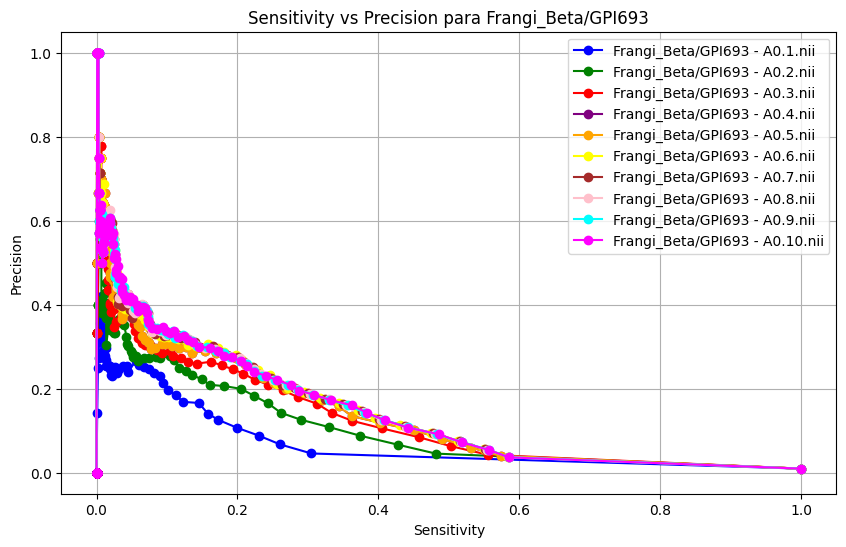

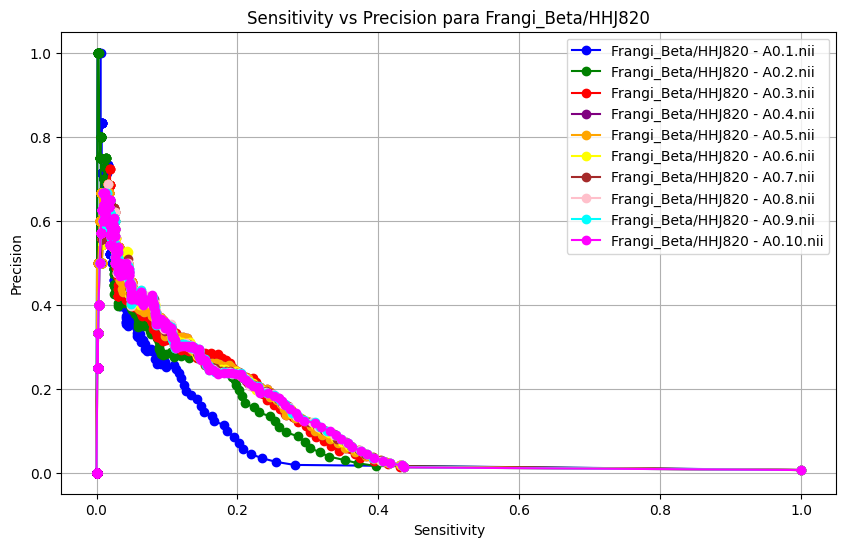

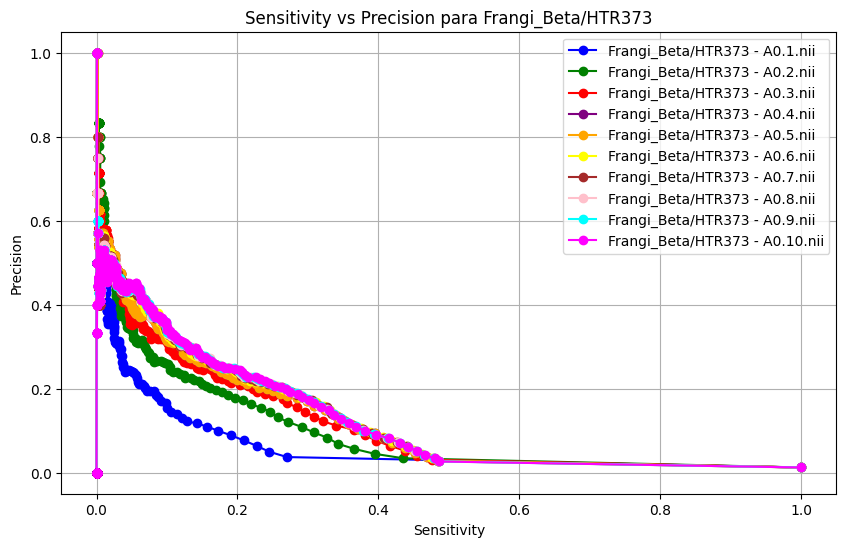

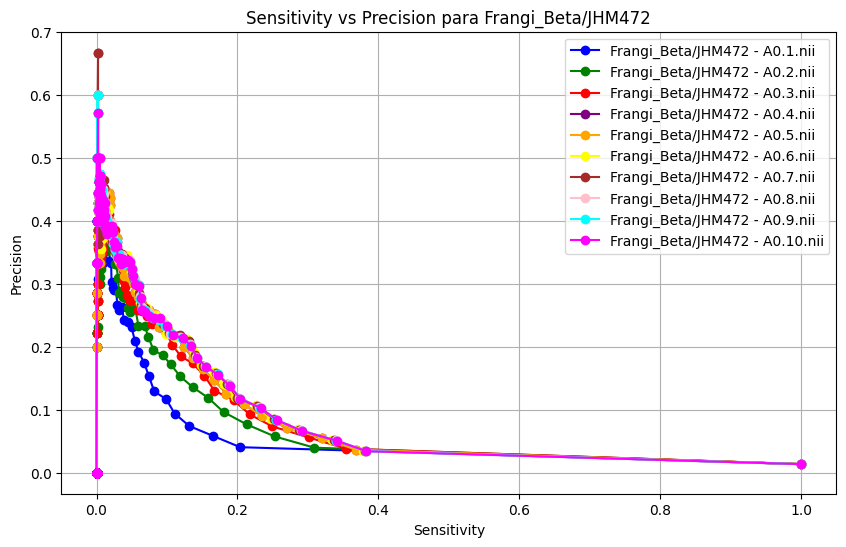

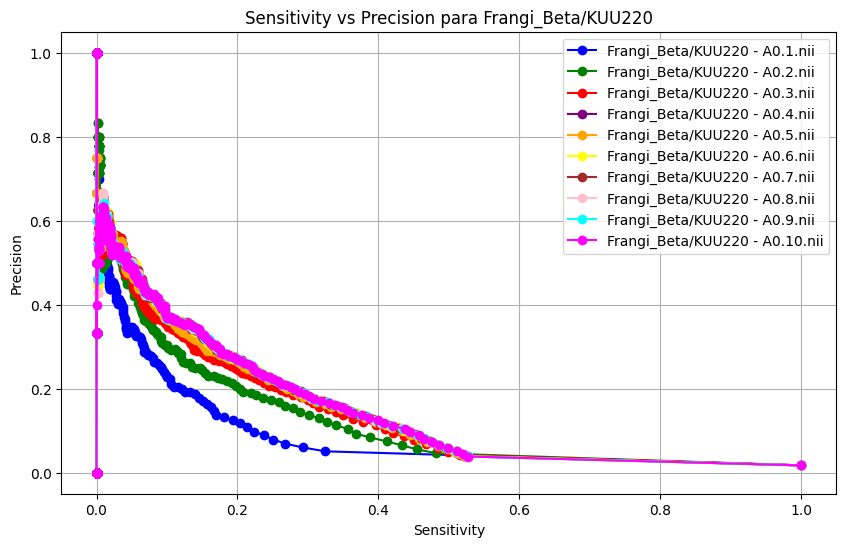

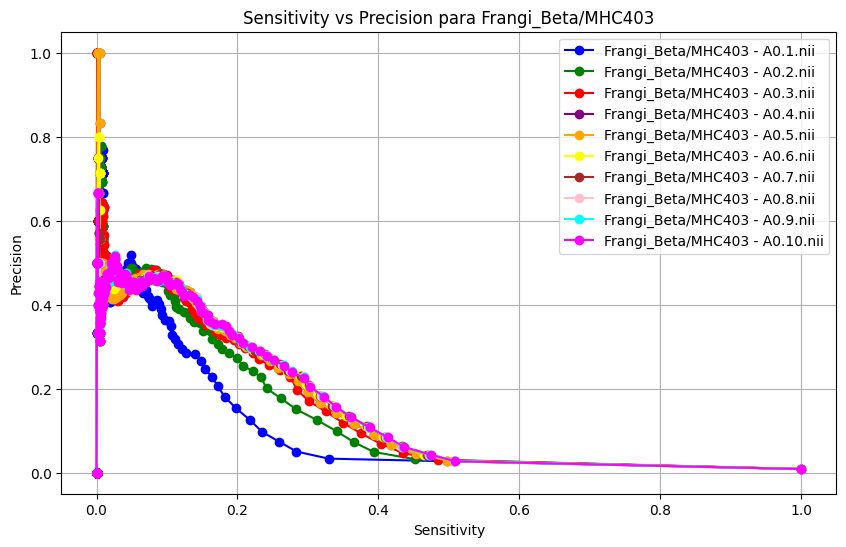

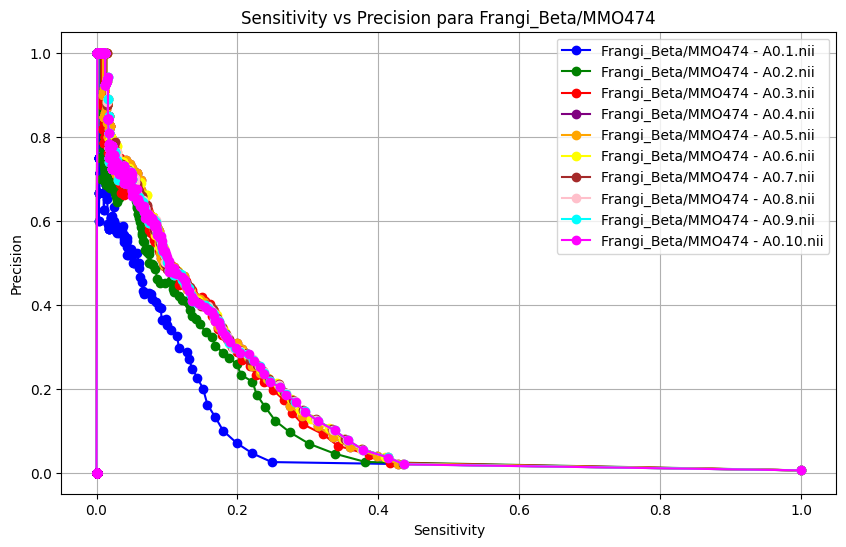

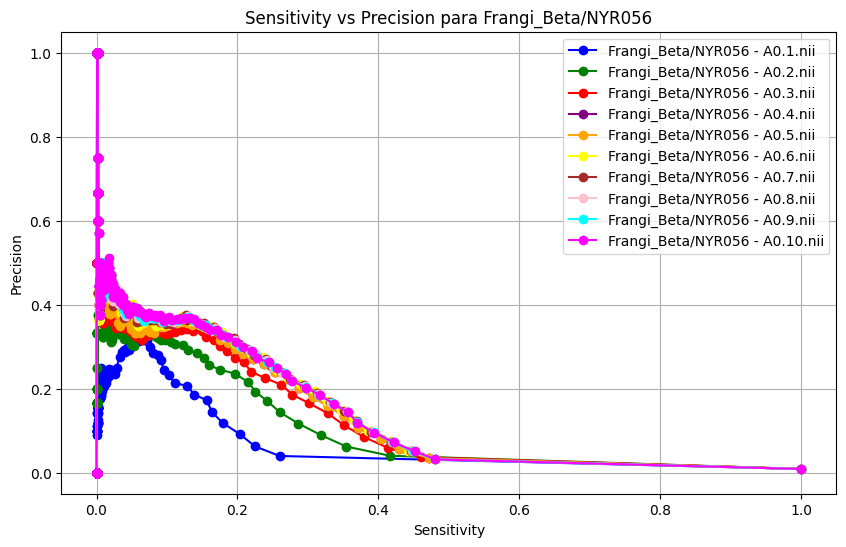

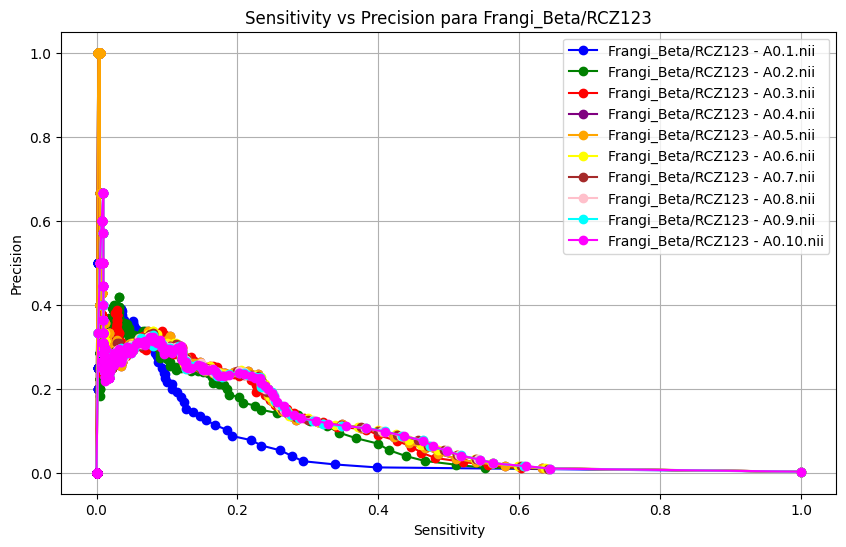

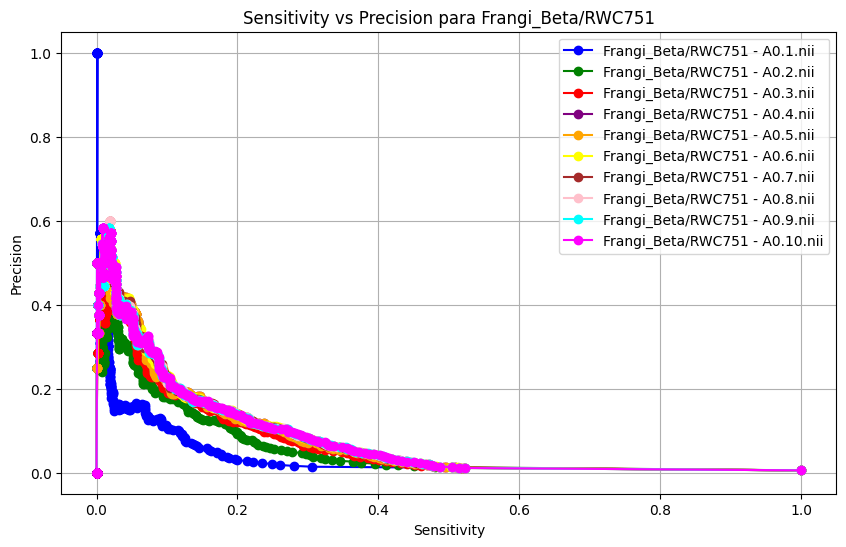

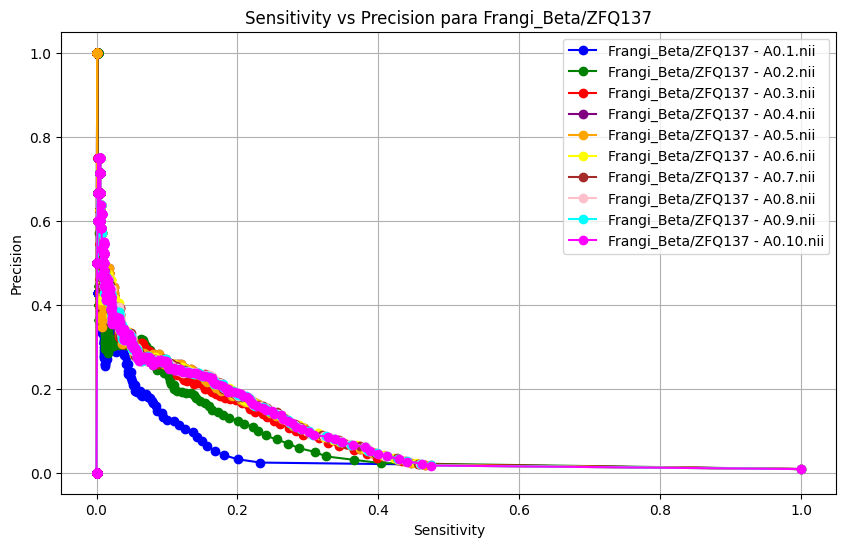

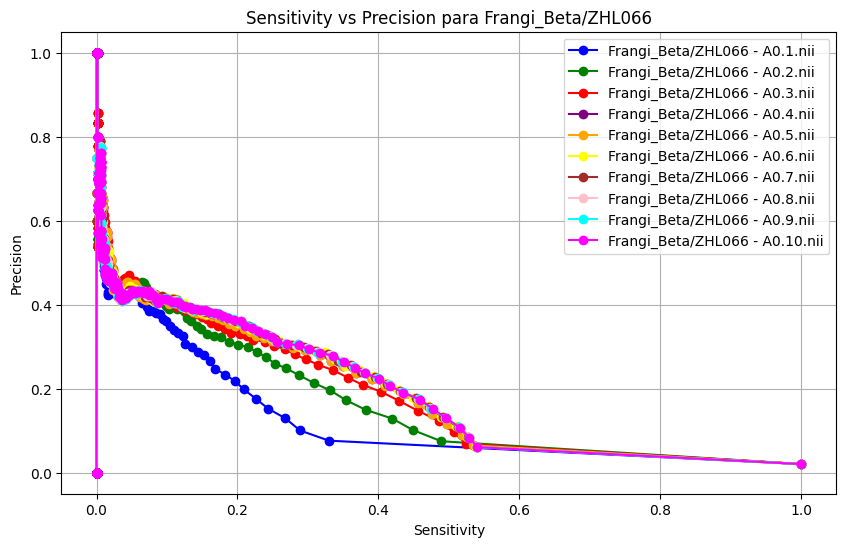

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('Frangi_Beta_BG.csv')

# Ensure 'sensitivity' and 'precision' columns are numeric
df['sensitivity'] = pd.to_numeric(df['sensitivity'], errors='coerce')
df['precision'] = pd.to_numeric(df['precision'], errors='coerce')

# Get unique SerieNames
serie_names = df['SerieName'].unique()

# Predefined list of 10 colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'cyan', 'magenta']

# Plot one figure per SerieName
for i, serie_name in enumerate(serie_names):
    # Filter by SerieName
    filtered_df = df[df['SerieName'] == serie_name]

    # Create new figure
    plt.figure(figsize=(10, 6))

    # Plot each VolumeName with a different color
    volume_names = filtered_df['VolumeName'].unique()
    for j, volume_name in enumerate(volume_names):
        volume_df = filtered_df[filtered_df['VolumeName'] == volume_name]
        color = colors[j % len(colors)]  # Cycle through colors
        plt.plot(volume_df['sensitivity'], volume_df['precision'], marker='o', linestyle='-', color=color, label=f'{serie_name} - {volume_name}')

    # Set title and axis labels
    plt.title(f'Sensitivity vs Precision for {serie_name}')
    plt.xlabel('Sensitivity')
    plt.ylabel('Precision')

    # Add legend and grid
    plt.legend(loc='best')
    plt.grid(True)

    # Show plot
    plt.show()